<img src = "https://oma.astrofisicamas.cl/wp-content/uploads/2021/11/LOGO-USM.png" title = "Title text" width = "60%" height = "60%" />


<hr style="height:1px;border:none"/>
<h1 align='center'> MAT279 - Optimización No Lineal</h1>

<h1 align='center'> Tarea 5  </h1>
<H3 align='center'> Estudiante: Pablo Calcumil Alarcón</H3>
<H3 align='center'> Profesor: Julio Deride Silva</H3>
<hr style="height:1px;border:none"/>

En el presente trabajo, se resolverá el siguiente problema

$$\min_{x \in \mathbb{R}^d} F(x) = \sum_{i \in I} f_i(x) + \lambda\mathcal{R}(x)$$



Se revisarán los siguientes modelos:

1. **Mínimos Cuadrados**:
Donde se considera
$$f_i(x) = (y_i − x^T w_i)^2 \hspace{.6cm};\hspace{.6cm} \mathcal{R} \equiv 0$$

2. **Ridge**:
Donde se considera
$$f_i(x) = (y_i − x^T w_i)^2 \hspace{.6cm};\hspace{.6cm} \mathcal{R} \equiv \lVert\cdot\rVert_2$$

<hr>

##### Pequeña exploración de datos


Dimensiones del primer conjunto de datos: (1140, 16)
Dimensiones del segundo conjunto de datos: (60, 16)

Distribución por coordenada de los datos del primer conjunto


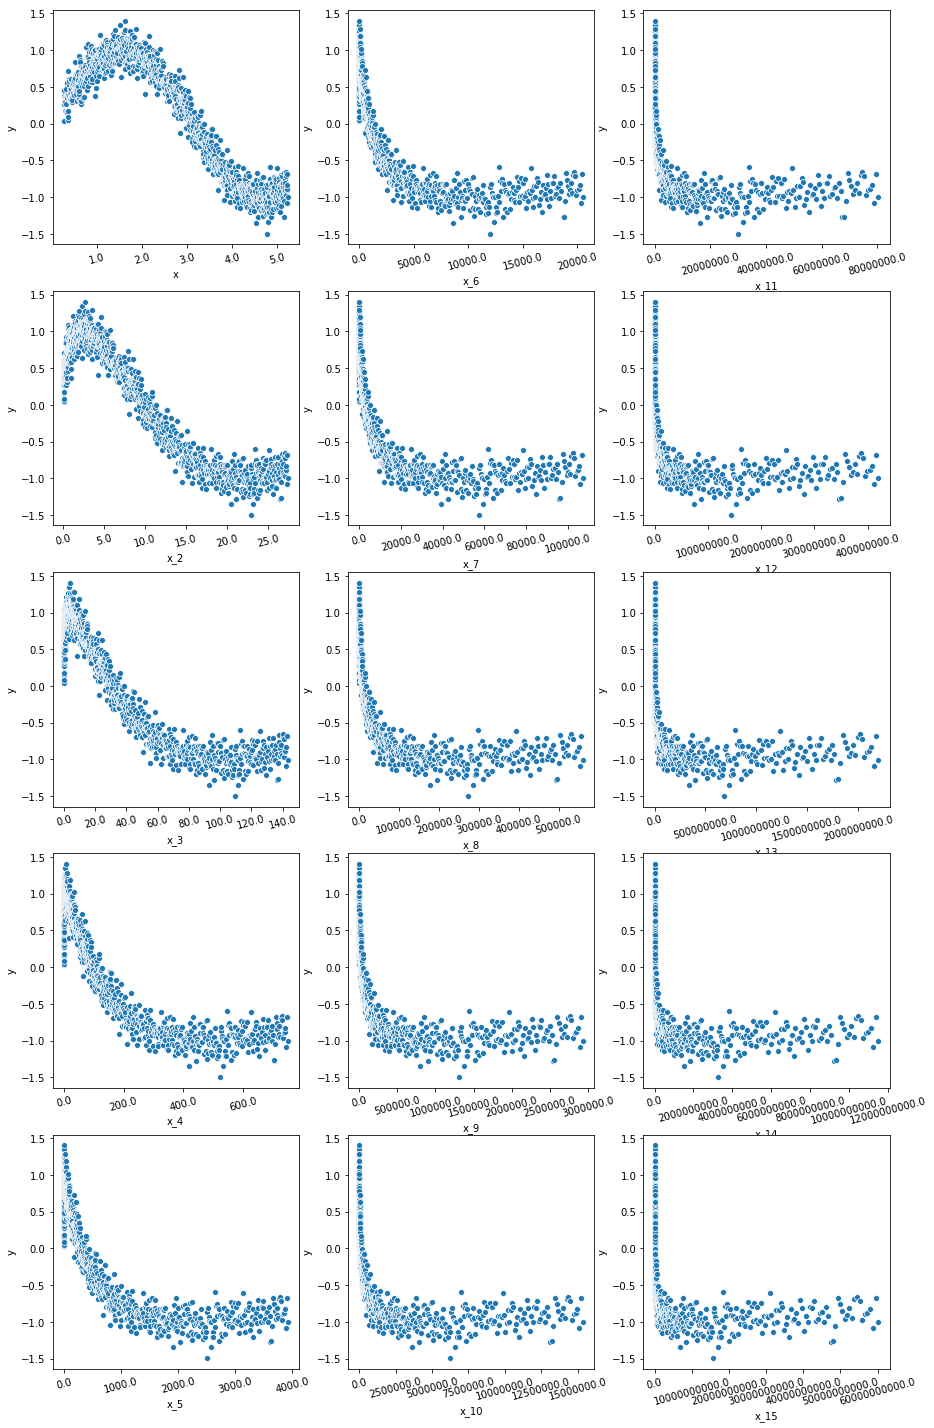


Distribución por coordenada de los datos del segundo conjunto


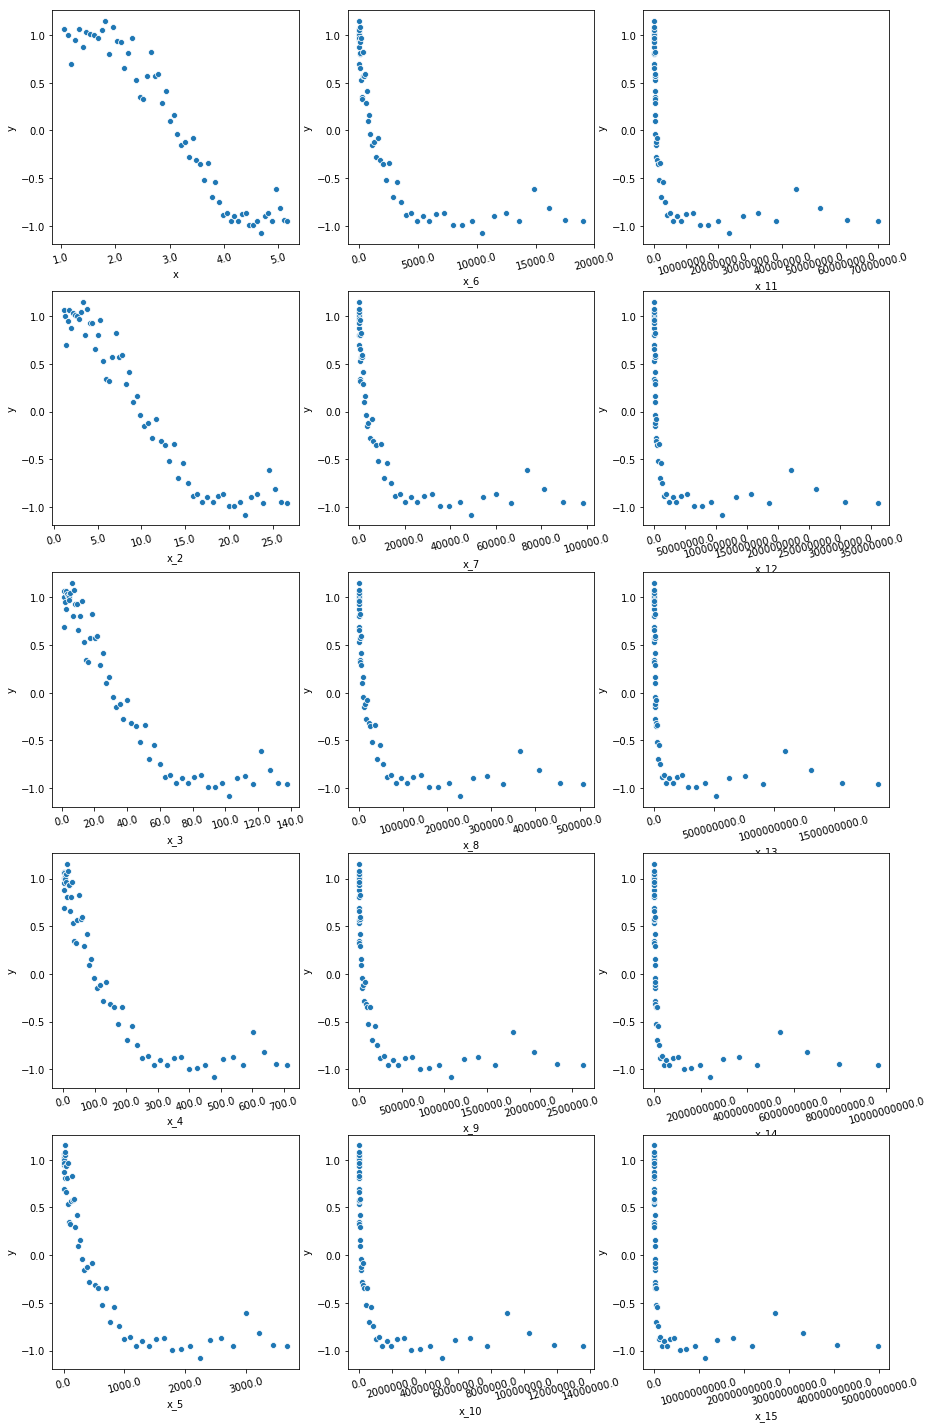

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data_1 = pd.read_csv('data.csv', ';')
print('Dimensiones del primer conjunto de datos:', data_1.shape)

data_2 = pd.read_csv('data1.csv', ';')
print('Dimensiones del segundo conjunto de datos:', data_2.shape)

#Columnas de datos 'x'
cols = [col for col in data_1.columns if col != 'y']

#1er Dataset
#Graficos de dispersion
print('\nDistribución por coordenada de los datos del primer conjunto')

fig, ax = plt.subplots(5, 3, figsize = (15, 25))

for i in range(0, 5):
    for j in range(0, 3):
        sns.scatterplot(data = data_1, x = cols[5 * j + i], y = 'y', ax = ax[i][j])
        ax[i][j].set_xticklabels(ax[i][j].get_xticks(), rotation = 15)

plt.show()

#2do Dataset
#Graficos de dispersion
print('\nDistribución por coordenada de los datos del segundo conjunto')

fig, ax = plt.subplots(5, 3, figsize = (15, 25))

for i in range(0, 5):
    for j in range(0, 3):
        sns.scatterplot(data = data_2, x = cols[5 * j + i], y = 'y', ax = ax[i][j])
        ax[i][j].set_xticklabels(ax[i][j].get_xticks(), rotation = 15)
    
plt.show()

<hr> 

##### Expectativas de resultados

In [2]:
#Observacion de lo que se puede esperar
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

#Separamos los datos
W_1 = data_1[cols].to_numpy()
Y_1 = data_1['y'].to_numpy()

W_2 = data_2[cols].to_numpy()
Y_2 = data_2['y'].to_numpy()

#Modelos de Regresion Lineal y Ridge
regresion1 = LinearRegression(fit_intercept = False) 
regresion1.fit(W_1, Y_1)

ridge1 = Ridge(alpha = 1.0, fit_intercept = False) 
ridge1.fit(W_1, Y_1)

regresion2 = LinearRegression(fit_intercept = False) 
regresion2.fit(W_2, Y_2) 

ridge2 = Ridge(alpha = 1.0, fit_intercept = False) 
ridge2.fit(W_2, Y_2)

print('-----------------------------------------------------------------------')
print('Modelo de regresion lineal de data_1:')
print('w = ' + str(regresion1.coef_))
Y_1pred = regresion1.predict(W_1)
print('\nMSE = ', round(mean_squared_error(Y_1, Y_1pred), 4))

print('-----------------------------------------------------------------------')

print('Modelo de ridge de data_1:')
print('w = ' + str(ridge1.coef_))
Y_1pred = ridge1.predict(W_1)
print('\nMSE = ', round(mean_squared_error(Y_1, Y_1pred), 4))

print('-----------------------------------------------------------------------')

print('Modelo de regresion lineal de data_2:')
print('w = ' + str(regresion2.coef_))
Y_2pred = regresion2.predict(W_2)
print('\nMSE = ', round(mean_squared_error(Y_2, Y_2pred), 4))

print('-----------------------------------------------------------------------')

print('Modelo de ridge de data_2:')
print('w = ' + str(ridge2.coef_))
Y_2pred = ridge2.predict(W_2)
print('\nMSE = ', round(mean_squared_error(Y_2, Y_2pred), 4))

print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Modelo de regresion lineal de data_1:
w = [ 2.00801615e+00 -7.04118311e+00  2.02724907e+01 -3.04899499e+01
  2.30000588e+01 -4.12364339e+00 -7.97214355e+00  8.28022857e+00
 -4.15516205e+00  1.29412645e+00 -2.63956299e-01  3.51339828e-02
 -2.91160770e-03  1.33830764e-04 -2.50905625e-06]

MSE =  0.0201
-----------------------------------------------------------------------
Modelo de ridge de data_1:
w = [ 8.84368787e-01  1.41427264e-01 -9.45349981e-02 -9.38987026e-02
 -1.60490324e-02  2.89723547e-02  8.33359314e-03 -1.50912775e-02
  8.78273197e-03 -3.71082091e-03  1.10702895e-03 -2.02895341e-04
  1.97392319e-05 -7.18622366e-07 -7.89811705e-09]

MSE =  0.0202
-----------------------------------------------------------------------
Modelo de regresion lineal de data_2:
w = [ 6.21675009e+01 -1.47782189e+02  7.97249295e+01  7.67175826e+01
 -8.63808630e+01 -2.86610848e+01  9.45871553e+01 -7.42936965e+01
  3.30259081e+01 -9

/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.81391e-23): result may not be accurate.
  overwrite_a=True).T


<hr>

##### 1. Justifique la convexidad de estos problemas.

Se tiene la función 

$$\min_{x \in \mathbb{R}^d} F(x) = \sum_{i \in I} f_i(x) + \lambda\mathcal{R}(x)$$

<br>

Veamos primero la convexidad para el modelo de mínimos cuadrados, donde $f_i(x) = [y_i - x^T w_i]^2$ y $\mathcal{R}(x) \equiv 0$

Sean $x,z \in \mathbb{R}^d$ y $\lambda \in [0,1]$, entonces

$$\left(y_i - \left[\lambda x + (1 - \lambda) z \right]^Tw_i\right)^2 = \left(\lambda [y_i - x^T w_i] + (1- \lambda) [y_i - z^T w_i] \right)^2$$

Tomando $p = y_i - x^T w_i$, y $q = y_i - z^T w_i$, suponemos que esta función no es convexa, es decir,

$$[\lambda p + (1 - \lambda) q]^2 > \lambda p^2 + (1 - \lambda) q^2$$

$$\lambda^2 p^2 + 2 \lambda (1 - \lambda)pq + (1 - \lambda)^2 q^2 > \lambda p^2 + (1 - \lambda) q^2$$

pasando todo a la derecha se tiene que

$$0 > \lambda p^2 - \lambda^2 p^2 + (1 - \lambda) q^2 - (1 - \lambda)^2 q^2 - 2 \lambda (1 - \lambda)pq = (p - q)^2$$

lo que es una contradicción pues $(p - q) \geq 0$

Por lo tanto, se tiene que es una función convexa, y al ser la función $F$ una suma finita de funciones convexas es convexa, por lo tanto el modelo de mínimos cuadrados es convexo.

<br>
<br>

Ahora seguimos con Ridge, donde es el modelo de mínimos cuadrados con la diferencia de $\mathcal{R}(x) = \equiv \lVert\cdot\rVert_2$, pero como es una norma sabemos que cumple desigualdad triangular y al multiplicarse por un real, sale su valor absoluto, y como este pertenece al intervalo $[0,1]$, es claro que es convexa y así el modelo Ridge también es convexo.

<hr>

##### 2. Implemente el Método del Gradiente con paso de Armijo, para los 2 modelos mencionados anteriormente.

In [3]:
def minimos_cuadrados(X, Y, W, n):
    
    #Inicio de la funcion
    F = 0
    
    #Sumatoria de los datos en funcion de minimos cuadrados
    for i in range(0, n):
        F = F + (Y[i] - np.dot(X.T, W[i])[0]) ** 2
    
    return F[0]

#------------------------------------------------------------------------------------------------

def dif_minimos_cuadrados(X, Y, W, n, cols):
    
    #inicio del vector
    DF = np.zeros((cols, 1))
    
    #Formamos la sumatoria de los vectores
    for i in range(0, n):
        
        W_i = W[i].T.reshape((cols, 1))
        DF = DF + (Y[i] - np.dot(X.T, W_i))[0] * W_i
    
    #Finalmente se multiplica por -2 debido a que estaba elevado al cuadrado
    #y por el coeficiente que acompañaba a wi
    DF = -2 * DF
    
    return DF
    
#------------------------------------------------------------------------------------------------

def gradiente_minimos_cuadrados(Y, W, epsilon, alfa, beta):
    
    #Dimensiones del dataframe
    row, col = W.shape
    
    #Se utiliza el vector 0 como valor inicial
    X = np.zeros((col, 1))
    
    #Se acomodan algunas dimensiones para el manejo algebraico
    largo = len(Y)
    Y = Y.reshape((largo, 1))
    
    #Calculamos el gradiente de la funcion
    gk = dif_minimos_cuadrados(X, Y, W, largo, col)
    norm_gk = np.linalg.norm(gk)
    
    #Contador
    k = 0
    
    while norm_gk >= epsilon:
        
        #Se define la direccion a tomar y el beta para el paso Armijo
        dk = -1 * gk
        beta_k = beta
        
        #Valores para el paso de Armijo
        valor_k = minimos_cuadrados(X + beta_k * dk, Y, W, largo) - minimos_cuadrados(X, Y, W, largo)
        tolerancia_k = alfa * beta_k * np.dot(dk.T, gk)
        
        #Si no se cumple la condicion de Armijo, seguimos hasta que se cumpla
        while valor_k > tolerancia_k:
            
            #Se actualiza el nuevo k para la potencia de beta que cumpla Armijo
            beta_k = beta_k * beta
            
            #Se actualizan los valores para la condicion de Armijo
            valor_k = minimos_cuadrados(X + beta_k * dk, Y, W, largo) - minimos_cuadrados(X, Y, W, largo)
            tolerancia_k = tolerancia_k * beta
            

        #Se actualiza el valor de X con el mayor beta_k tal que cumple Armijo
        X = X + beta_k * dk
        
        #Se calcula el gradiente de la funcion con X actualizado
        gk = dif_minimos_cuadrados(X, Y, W, largo, col)
        norm_gk = np.linalg.norm(gk)
        
        if k < 10:

            k = k + 1
            print('\nIteracion' + str(k) + '.-\n', X.T)
    
    return X

<hr>

In [4]:
def ridge(X, Y, W, n, lambdaa):
    
    #Se obtiene la sumatoria del modelo ridge y la suma con la norma
    F = minimos_cuadrados(X, Y, W, n) + lambdaa * np.linalg.norm(X)
    
    return F

#------------------------------------------------------------------------------------------------

def dif_ridge(X, Y, W, n, cols, lambdaa):
    
    #Se obtiene la derivada de la primera parte de la funcion
    DF = dif_minimos_cuadrados(X, Y, W, n, cols)
    
    #Luego se suma con la derivada de la norma
    DF = DF + lambdaa * (X / np.linalg.norm(X))
    
    return DF

#------------------------------------------------------------------------------------------------

def gradiente_ridge(Y, W, lambdaa, epsilon, alfa, beta):
    
    #Dimensiones del dataframe
    row, col = W.shape
    
    #Se utiliza el vector 0 como valor inicial
    X = np.ones((col, 1)) * 0.5
    
    #Se acomodan algunas dimensiones para el manejo algebraico
    largo = len(Y)
    Y = Y.reshape((largo, 1))
    
    #Calculamos el gradiente de la funcion
    gk = dif_ridge(X, Y, W, largo, col, lambdaa)
    norm_gk = np.linalg.norm(gk)
    
    #Contador
    k = 0
    
    while norm_gk >= epsilon:
        
        #Se define la direccion a tomar y el beta para el paso Armijo
        dk = -1 * gk
        beta_k = beta
        
        #Valores para el paso de Armijo
        valor_k = ridge(X + beta_k * dk, Y, W, largo, lambdaa) - ridge(X, Y, W, largo, lambdaa)
        tolerancia_k = alfa * beta_k * np.dot(dk.T, gk)[0][0]
        
        #Si no se cumple la condicion de Armijo, seguimos hasta que se cumpla
        while valor_k > tolerancia_k:
            
            #Se actualiza el nuevo k para la potencia de beta que cumpla Armijo
            beta_k = beta_k * beta
            
            #Se actualizan los valores para la condicion de Armijo
            valor_k = ridge(X + beta_k * dk, Y, W, largo, lambdaa) - ridge(X, Y, W, largo, lambdaa)
            tolerancia_k = tolerancia_k * beta            

        #Se actualiza el valor de X con el mayor beta_k tal que cumple Armijo
        X = X + beta_k * dk
        
        #Se calcula el gradiente de la funcion con X actualizado
        gk = dif_ridge(X, Y, W, largo, col, lambdaa)
        norm_gk = np.linalg.norm(gk)
        
        if k < 10:
            
            k = k + 1
            print('\nIteracion' + str(k) + '.-\n', X.T)
    
    return X

<hr>

##### 3. Estimar coeficientes para los modelos con $\lambda = 1$, y presentar las primeras 10 iteraciones

In [5]:
#Modelo de minimos cuadrados
gradiente_minimos_cuadrados(Y_2, W_2, 100, 0.8, 0.8)


Iteracion1.-
 [[-2.48545928e-21 -1.64582355e-20 -8.45127842e-20 -4.05983416e-19
  -1.91170861e-18 -8.96564770e-18 -4.21349452e-17 -1.98901332e-16
  -9.43891331e-16 -4.50349632e-15 -2.15993918e-14 -1.04102337e-13
  -5.04022634e-13 -2.45048262e-12 -1.19595083e-11]]

Iteracion2.-
 [[-4.14752030e-21 -2.88734744e-20 -1.49112409e-19 -7.13615249e-19
  -3.33644027e-18 -1.55146142e-17 -7.22520631e-17 -3.37926885e-16
  -1.58895038e-15 -7.51318259e-15 -3.57204993e-14 -1.70715982e-13
  -8.19876207e-13 -3.95536401e-12 -1.91618798e-11]]

Iteracion3.-
 [[-5.31327736e-21 -3.88518015e-20 -2.01709433e-19 -9.61966087e-19
  -4.46764934e-18 -2.06069427e-17 -9.51255318e-17 -4.40862851e-16
  -2.05389124e-15 -9.62249097e-15 -4.53341575e-14 -2.14733781e-13
  -1.02231332e-12 -4.89029712e-12 -2.34969546e-11]]

Iteracion4.-
 [[-6.17988193e-21 -4.73612617e-20 -2.47071832e-19 -1.17458518e-18
  -5.42193767e-18 -2.48212857e-17 -1.13632919e-16 -5.22046021e-16
  -2.41026715e-15 -1.11891043e-14 -5.22309951e-14 -2.45132

KeyboardInterrupt: 

In [6]:
#Modelo Ridge
gradiente_ridge(Y_2, W_2, 1, 100, 0.8, 0.8)


Iteracion1.-
 [[0.5        0.5        0.5        0.5        0.49999998 0.49999988
  0.4999994  0.499997   0.49998502 0.49992512 0.49962527 0.49812203
  0.4905763  0.45265503 0.26187156]]

Iteracion2.-
 [[0.5        0.5        0.5        0.49999999 0.49999996 0.49999981
  0.49999903 0.49999518 0.49997597 0.49987995 0.49939926 0.49698955
  0.48489453 0.42411434 0.11834392]]

Iteracion3.-
 [[0.5        0.5        0.5        0.49999999 0.49999995 0.49999976
  0.49999881 0.49999409 0.49997052 0.49985269 0.49926288 0.49630642
  0.48146816 0.40690765 0.03183557]]

Iteracion4.-
 [[ 0.5         0.5         0.5         0.49999999  0.49999995  0.49999973
   0.49999868  0.49999343  0.49996721  0.49983621  0.49918052  0.49589412
   0.47940119  0.39653238 -0.0203052 ]]

Iteracion5.-
 [[ 0.5         0.5         0.5         0.49999999  0.49999994  0.49999972
   0.4999986   0.49999302  0.49996522  0.49982624  0.49913073  0.49564506
   0.47815359  0.39027465 -0.05173141]]

Iteracion6.-
 [[ 0.5         

KeyboardInterrupt: 

Se puede ver que para ambos metodos el avance es muy lento, pues para el modelo de los minimos cuadrados se parte desde 

$$x_0 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)$$

Mientras que para el modelo de Ridge desde

$$x_0 = (0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5)$$


Dado la demora en los algoritmos se utilizaran como base los valores dados por el paquete de sklearn, y notamos que como el movimiento del vector en cada iteración es muy bajo, podemos notar que estos se demoraran bastante para lograr llegar al mínimo del problema.


<hr>

##### 4. Estime regresiones Ridge con $\lambda \in \{0.01, 0.1, 1, 10, 1000\}$


In [7]:
W_3 = data_2[['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8']].to_numpy()

print(gradiente_ridge(Y_2, W_3, .001, 100, 0.8, 0.8))


Iteracion1.-
 [[0.49999659 0.49998394 0.4999236  0.49963401 0.49823564 0.49144892
  0.45836423 0.29644906]]

Iteracion2.-
 [[0.49999432 0.49997326 0.49987287 0.49939116 0.49706575 0.48578234
  0.4307874  0.16169025]]

Iteracion3.-
 [[0.49999281 0.49996614 0.49983913 0.49922984 0.49628943 0.48202546
  0.41251834 0.07247544]]

Iteracion4.-
 [[0.4999918  0.49996139 0.49981663 0.4991225  0.49577368 0.47953289
  0.40041151 0.01341317]]

Iteracion5.-
 [[ 0.49999111  0.4999582   0.49980159  0.49905089  0.49543043  0.47787737
   0.39238441 -0.02568652]]

Iteracion6.-
 [[ 0.49999065  0.49995605  0.49979147  0.49900294  0.4952014   0.47677602
   0.3870583  -0.05156995]]

Iteracion7.-
 [[ 0.49999033  0.49995458  0.49978462  0.49897066  0.49504797  0.47604156
   0.38352039 -0.0687035 ]]

Iteracion8.-
 [[ 0.4999901   0.49995356  0.49977993  0.49894874  0.49494461  0.47555
   0.38116636 -0.08004417]]

Iteracion9.-
 [[ 0.49998994  0.49995284  0.49977666  0.4989337   0.49487439  0.47521925
   0.37959

KeyboardInterrupt: 

In [8]:
W_3 = data_2[['x', 'x_2', 'x_3', 'x_4']].to_numpy()

x_1 = gradiente_ridge(Y_2, W_3, .001, 100, 0.8, 0.8)

print(x_1)


Iteracion1.-
 [[0.49787699 0.49061379 0.45754227 0.30461439]]

Iteracion2.-
 [[0.4964248  0.48421354 0.42865768 0.17192246]]

Iteracion3.-
 [[0.49542823 0.47984133 0.40899183 0.08181133]]

Iteracion4.-
 [[0.49474111 0.47684654 0.39558725 0.02062058]]

Iteracion5.-
 [[ 0.49426417  0.47478729  0.38643525 -0.0209278 ]]

Iteracion6.-
 [[ 0.49392999  0.47336346  0.38017158 -0.04913532]]

Iteracion7.-
 [[ 0.49369276  0.4723712   0.37586964 -0.06828189]]

Iteracion8.-
 [[ 0.4935214   0.47167206  0.3729001  -0.08127437]]

Iteracion9.-
 [[ 0.49339477  0.47117202  0.37083551 -0.09008707]]

Iteracion10.-
 [[ 0.49329852  0.47080721  0.36938558 -0.09606092]]
[[ 0.38844558]
 [ 0.20305628]
 [-0.15069849]
 [ 0.01705846]]


In [9]:
x_2 = gradiente_ridge(Y_2, W_3, .01, 100, 0.8, 0.8)

print(x_2)


Iteracion1.-
 [[0.49787699 0.49061379 0.45754227 0.30461439]]

Iteracion2.-
 [[0.4964248  0.48421354 0.42865768 0.17192246]]

Iteracion3.-
 [[0.49542823 0.47984132 0.40899183 0.08181133]]

Iteracion4.-
 [[0.49474111 0.47684654 0.39558725 0.02062058]]

Iteracion5.-
 [[ 0.49426417  0.47478729  0.38643525 -0.0209278 ]]

Iteracion6.-
 [[ 0.49392999  0.47336346  0.38017158 -0.04913532]]

Iteracion7.-
 [[ 0.49369276  0.4723712   0.37586964 -0.06828189]]

Iteracion8.-
 [[ 0.4935214   0.47167206  0.37290009 -0.08127437]]

Iteracion9.-
 [[ 0.49339476  0.47117202  0.37083551 -0.09008707]]

Iteracion10.-
 [[ 0.49329851  0.47080721  0.36938558 -0.09606092]]
[[ 0.38844232]
 [ 0.20305464]
 [-0.15069712]
 [ 0.01705828]]


In [10]:
x_3 = gradiente_ridge(Y_2, W_3, 1, 100, 0.8, 0.8)

print(x_3)


Iteracion1.-
 [[0.49787697 0.49061377 0.45754225 0.30461437]]

Iteracion2.-
 [[0.49642476 0.4842135  0.42865765 0.17192243]]

Iteracion3.-
 [[0.49542817 0.47984127 0.40899178 0.08181131]]

Iteracion4.-
 [[0.49474103 0.47684646 0.39558718 0.02062057]]

Iteracion5.-
 [[ 0.49426407  0.4747872   0.38643517 -0.0209278 ]]

Iteracion6.-
 [[ 0.49392987  0.47336334  0.38017149 -0.04913531]]

Iteracion7.-
 [[ 0.49369262  0.47237106  0.37586953 -0.06828187]]

Iteracion8.-
 [[ 0.49352123  0.47167191  0.37289997 -0.08127434]]

Iteracion9.-
 [[ 0.49339458  0.47117185  0.37083537 -0.09008704]]

Iteracion10.-
 [[ 0.49329831  0.47080702  0.36938542 -0.09606088]]
[[ 0.38807907]
 [ 0.20283424]
 [-0.15065956]
 [ 0.0170642 ]]


In [11]:
x_4 = gradiente_ridge(Y_2, W_3, 10, 100, 0.8, 0.8)

print(x_4)


Iteracion1.-
 [[0.49787681 0.49061362 0.4575421  0.30461421]]

Iteracion2.-
 [[0.49642443 0.48421318 0.42865735 0.17192223]]

Iteracion3.-
 [[0.49542766 0.47984077 0.40899134 0.08181114]]

Iteracion4.-
 [[0.49474033 0.47684578 0.3955866  0.02062045]]

Iteracion5.-
 [[ 0.49426318  0.47478633  0.38643446 -0.02092784]]

Iteracion6.-
 [[ 0.49392878  0.4733623   0.38017064 -0.04913527]]

Iteracion7.-
 [[ 0.49369134  0.47236983  0.37586854 -0.06828175]]

Iteracion8.-
 [[ 0.49351975  0.47167049  0.37289884 -0.08127414]]

Iteracion9.-
 [[ 0.4933929   0.47117025  0.3708341  -0.09008677]]

Iteracion10.-
 [[ 0.49329644  0.47080523  0.36938402 -0.09606054]]
[[ 0.38483825]
 [ 0.20131053]
 [-0.14898529]
 [ 0.01681289]]


In [12]:
x_5 = gradiente_ridge(Y_2, W_3, 1000, 100, 0.8, 0.8)

print(x_5)


Iteracion1.-
 [[0.49785973 0.49059653 0.45752502 0.30459713]]

Iteracion2.-
 [[0.49638829 0.48417757 0.42862413 0.17190011]]

Iteracion3.-
 [[0.49537127 0.47978577 0.40894264 0.08179156]]

Iteracion4.-
 [[0.49466305 0.47677094 0.39552279 0.0206076 ]]

Iteracion5.-
 [[ 0.4941647   0.47469141  0.38635569 -0.02093209]]

Iteracion6.-
 [[ 0.49380894  0.47324717  0.3800769  -0.0491304 ]]

Iteracion7.-
 [[ 0.49355006  0.47223443  0.37575975 -0.06826796]]

Iteracion8.-
 [[ 0.493357    0.47151476  0.37277487 -0.08125197]]

Iteracion9.-
 [[ 0.49320865  0.47099414  0.3706948  -0.09005683]]

Iteracion10.-
 [[ 0.49309067  0.47060872  0.36922927 -0.09602344]]
[[ 1.55466064e-04]
 [ 1.75394891e-04]
 [-8.08657920e-05]
 [-1.62887790e-03]]


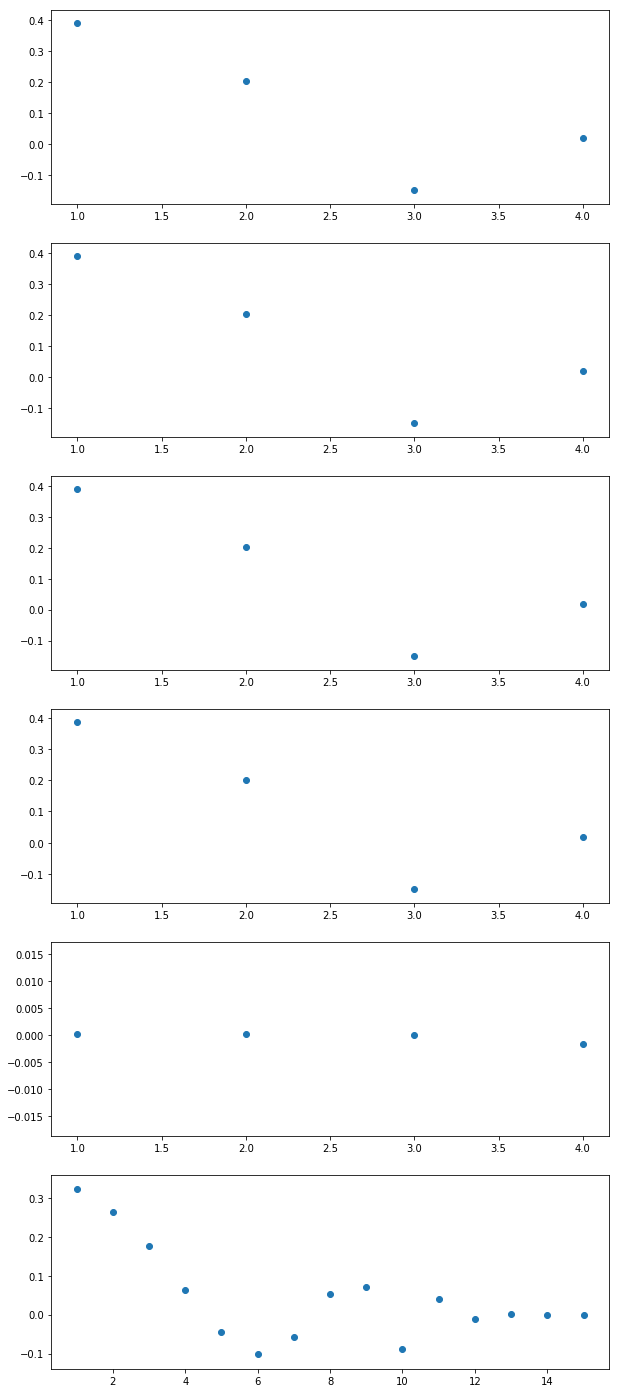

In [13]:
fig, ax = plt.subplots(6, 1, figsize = (10, 25))

ax[0].scatter([1,2,3,4], x_1)
ax[1].scatter([1,2,3,4], x_2)
ax[2].scatter([1,2,3,4], x_3)
ax[3].scatter([1,2,3,4], x_4)
ax[4].scatter([1,2,3,4], x_5)
ax[5].scatter(list(range(1,16)), ridge2.coef_)
plt.show()

Es facil notar que los coeficientes obtenidos no tienen una diferencia muy significativa para los casos en que se consideraron las primeras 4 columnas de los datos, esto pues la diferencia entre los datos no era muy significativa. Por otro lado, para los datos completos se puede ver que los valores son mas pequeños, esto dado la magnitud de los datos presentes en esas columnas, pues son estos valores a los que se les debe dar menores valores para así minimizar las funciones de los modelos.


Por otro lado, notamos que el algoritmo tambien es mas rapido para los niveles de poda mas alto, es decir, para valores de $\lambda$ más grandes, esto pues al tratar de minimizar la función los valores no pueden estar muy lejanos del 0.
<hr>